# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

In [23]:
data_frame = pd.read_csv("../exercise5/agaricus-lepiota.data", names=["edibility","cap-shape","cap-surface","cap-color","bruises?","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"])

x, y = pd.get_dummies(data_frame.iloc[:, 1:]), data_frame['edibility']

In [24]:
# kmeans_model = KMeans(n_clusters=7).fit(x)
# labels = kmeans_model.labels_
# metrics.silhouette_score(x, labels, metric='euclidean')


In [25]:

scores = []
steps = []
init_k = 2
for i in range(init_k, 30):
	kmeans_model = KMeans(n_clusters=i).fit(x)
	labels = kmeans_model.labels_
	scores.append(metrics.silhouette_score(x, labels, metric='euclidean'))
	steps.append(i)


Best k: 10


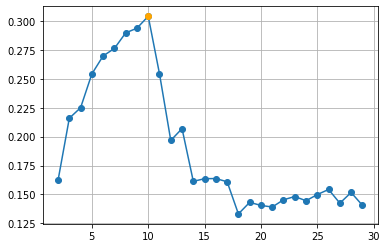

In [26]:

np.array(scores)
argmax = np.argmax(scores)
plt.plot(steps, scores, marker='o')
plt.plot(steps[argmax], scores[argmax], marker='o', c='orange')
plt.grid()
best_k = argmax + init_k
print(f"Best k: {best_k}")

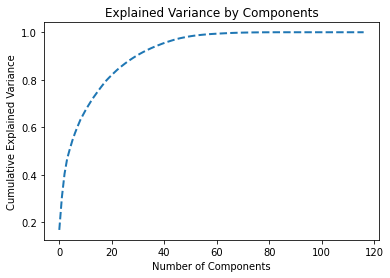

In [27]:

pca = PCA(n_components=len(x.columns))
pca.fit(x)
amount = len(pca.explained_variance_ )
plt.figure()
plt.plot(range(0, amount), pca.explained_variance_ratio_.cumsum(), linestyle='--', linewidth=2)
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

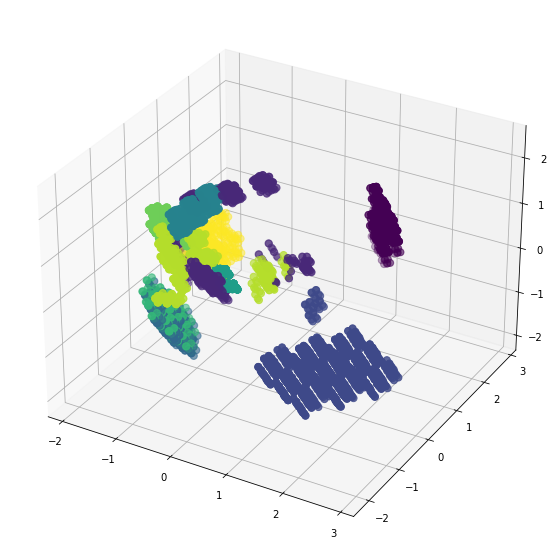

In [28]:
pca = PCA(n_components=20)
x_new = pca.fit_transform(x)
labels = KMeans(n_clusters=best_k).fit_predict(x_new)
pca = PCA(n_components=3)
x_plot = np.array(pca.fit_transform(x))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=50, cmap='viridis')